This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2024-05-20 11:08:16.581895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-20 11:08:16.582890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2
Epoch 1/10


2024-05-20 11:08:17.505497: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-20 11:08:18.780366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 0.6114 - accuracy: 0.8100

2024-05-20 11:08:33.729988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 18s 37ms/step - loss: 0.6105 - accuracy: 0.8103 - val_loss: 0.2409 - val_accuracy: 0.9274
Epoch 2/10
375/375 [==============================] - 13s 35ms/step - loss: 0.2451 - accuracy: 0.9239 - val_loss: 0.1745 - val_accuracy: 0.9482
Epoch 3/10
375/375 [==============================] - 10s 27ms/step - loss: 0.1593 - accuracy: 0.9514 - val_loss: 0.1690 - val_accuracy: 0.9462
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.1125 - accuracy: 0.9655 - val_loss: 0.1283 - val_accuracy: 0.9632
Epoch 5/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0828 - accuracy: 0.9736 - val_loss: 0.1303 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0610 - accuracy: 0.9802 - val_loss: 0.1303 - val_accuracy: 0.9636
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0443 - accuracy: 0.9853 - val_loss: 0.1157 - val_accuracy: 0.9685
Epo

2024-05-20 11:10:20.996541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 0.2846 - accuracy: 0.9180

2024-05-20 11:10:31.128641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 13s 30ms/step - loss: 0.2843 - accuracy: 0.9181 - val_loss: 0.1515 - val_accuracy: 0.9560
Epoch 2/10
375/375 [==============================] - 10s 27ms/step - loss: 0.1171 - accuracy: 0.9657 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.0923 - val_accuracy: 0.9729
Epoch 4/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0556 - accuracy: 0.9837 - val_loss: 0.0811 - val_accuracy: 0.9756
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0848 - val_accuracy: 0.9767
Epoch 6/10
375/375 [==============================] - 8s 23ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0846 - val_accuracy: 0.9777
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0235 - accuracy: 0.9934 - val_loss: 0.0862 - val_accuracy: 0.9764
Epoch 

**Plotting a validation accuracy comparison**

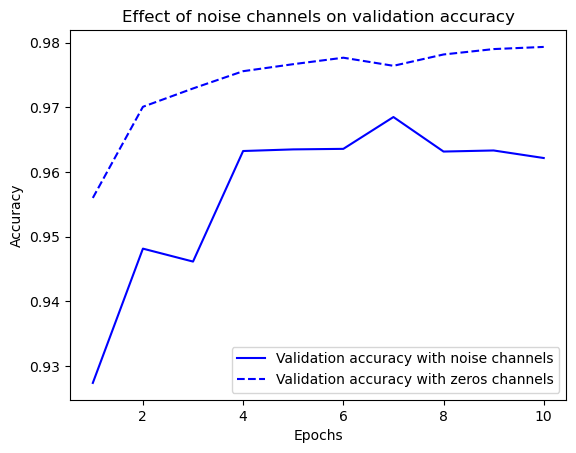

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100


2024-05-20 11:14:47.415978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 2.3157 - accuracy: 0.1047

2024-05-20 11:14:59.315869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 14s 33ms/step - loss: 2.3157 - accuracy: 0.1047 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 2/100
375/375 [==============================] - 9s 24ms/step - loss: 2.2999 - accuracy: 0.1167 - val_loss: 2.3152 - val_accuracy: 0.1030
Epoch 3/100
375/375 [==============================] - 10s 26ms/step - loss: 2.2900 - accuracy: 0.1249 - val_loss: 2.3219 - val_accuracy: 0.1004
Epoch 4/100
375/375 [==============================] - 10s 27ms/step - loss: 2.2752 - accuracy: 0.1407 - val_loss: 2.3299 - val_accuracy: 0.1015
Epoch 5/100
375/375 [==============================] - 9s 25ms/step - loss: 2.2575 - accuracy: 0.1548 - val_loss: 2.3336 - val_accuracy: 0.1082
Epoch 6/100
375/375 [==============================] - 10s 26ms/step - loss: 2.2358 - accuracy: 0.1716 - val_loss: 2.3516 - val_accuracy: 0.1032
Epoch 7/100
375/375 [==============================] - 12s 33ms/step - loss: 2.2096 - accuracy: 0.1849 - val_loss: 2.3666 - val_accuracy: 0.1033

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10


2024-05-20 12:12:42.095685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 676.1859 - accuracy: 0.3547

2024-05-20 12:12:51.745712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 12s 28ms/step - loss: 674.3882 - accuracy: 0.3543 - val_loss: 8.4894 - val_accuracy: 0.2254
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 5.5150 - accuracy: 0.2104 - val_loss: 2.2641 - val_accuracy: 0.1825
Epoch 3/10
375/375 [==============================] - 13s 35ms/step - loss: 2.9619 - accuracy: 0.1979 - val_loss: 2.4169 - val_accuracy: 0.2224
Epoch 4/10
375/375 [==============================] - 14s 36ms/step - loss: 2.6630 - accuracy: 0.2249 - val_loss: 2.3926 - val_accuracy: 0.2212
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 2.5049 - accuracy: 0.2134 - val_loss: 2.1636 - val_accuracy: 0.2092
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 2.4774 - accuracy: 0.2191 - val_loss: 2.0600 - val_accuracy: 0.2069
Epoch 7/10
375/375 [==============================] - 11s 28ms/step - loss: 2.4245 - accuracy: 0.2177 - val_loss: 2.0678 - val_accuracy: 0.2250
Ep

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10


2024-05-20 12:14:36.941584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.9101

2024-05-20 12:14:48.117490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 13s 31ms/step - loss: 0.3666 - accuracy: 0.9101 - val_loss: 0.2508 - val_accuracy: 0.9336
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1379 - accuracy: 0.9642 - val_loss: 0.1557 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 10s 28ms/step - loss: 0.1130 - accuracy: 0.9732 - val_loss: 0.1539 - val_accuracy: 0.9690
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.1011 - accuracy: 0.9768 - val_loss: 0.1580 - val_accuracy: 0.9734
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0804 - accuracy: 0.9827 - val_loss: 0.2044 - val_accuracy: 0.9714
Epoch 6/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0837 - accuracy: 0.9835 - val_loss: 0.2171 - val_accuracy: 0.9733
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0733 - accuracy: 0.9859 - val_loss: 0.2861 - val_accuracy: 0.9680
Epoc

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20


2024-05-20 12:16:29.369891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


374/375 [============================>.] - ETA: 0s - loss: 0.6779 - accuracy: 0.8299

2024-05-20 12:16:43.431263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 17s 35ms/step - loss: 0.6769 - accuracy: 0.8301 - val_loss: 0.3588 - val_accuracy: 0.9037
Epoch 2/20
375/375 [==============================] - 8s 20ms/step - loss: 0.3511 - accuracy: 0.9034 - val_loss: 0.3083 - val_accuracy: 0.9136
Epoch 3/20
375/375 [==============================] - 10s 27ms/step - loss: 0.3156 - accuracy: 0.9118 - val_loss: 0.2901 - val_accuracy: 0.9202
Epoch 4/20
375/375 [==============================] - 8s 21ms/step - loss: 0.2994 - accuracy: 0.9163 - val_loss: 0.2823 - val_accuracy: 0.9208
Epoch 5/20
375/375 [==============================] - 7s 20ms/step - loss: 0.2894 - accuracy: 0.9194 - val_loss: 0.2772 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.2829 - accuracy: 0.9215 - val_loss: 0.2719 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 8s 20ms/step - loss: 0.2784 - accuracy: 0.9221 - val_loss: 0.2696 - val_accuracy: 0.9256
Epoch 8/

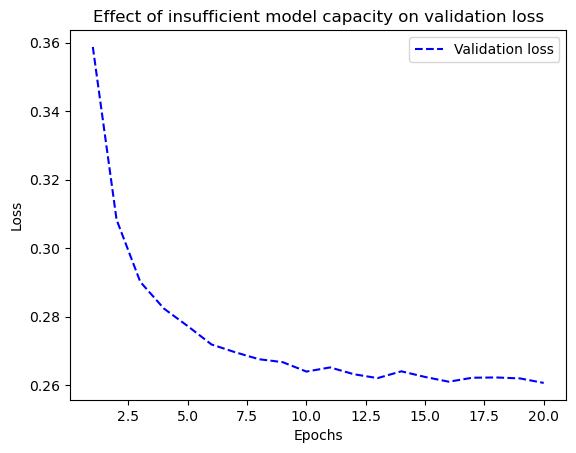

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20


2024-05-20 12:19:29.114537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


373/375 [============================>.] - ETA: 0s - loss: 0.3620 - accuracy: 0.8970

2024-05-20 12:19:40.902243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 15s 33ms/step - loss: 0.3610 - accuracy: 0.8972 - val_loss: 0.1776 - val_accuracy: 0.9494
Epoch 2/20
375/375 [==============================] - 14s 37ms/step - loss: 0.1576 - accuracy: 0.9533 - val_loss: 0.1347 - val_accuracy: 0.9621
Epoch 3/20
375/375 [==============================] - 15s 39ms/step - loss: 0.1131 - accuracy: 0.9650 - val_loss: 0.1203 - val_accuracy: 0.9636
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.1068 - val_accuracy: 0.9684
Epoch 5/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.1045 - val_accuracy: 0.9692
Epoch 6/20
375/375 [==============================] - 14s 38ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.0959 - val_accuracy: 0.9728
Epoch 7/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0979 - val_accuracy: 0.9724
Epo

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

In [16]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']
    
    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']
    
    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']
    
    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-05-20 12:25:36.003379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.7891

2024-05-20 12:25:48.268313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 15s 229ms/step - loss: 0.4968 - accuracy: 0.7891 - val_loss: 0.3646 - val_accuracy: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2930 - accuracy: 0.9017 - val_loss: 0.3027 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2216 - accuracy: 0.9259 - val_loss: 0.2750 - val_accuracy: 0.8937
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1733 - accuracy: 0.9431 - val_loss: 0.3467 - val_accuracy: 0.8598
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1404 - accuracy: 0.9551 - val_loss: 0.2897 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1173 - accuracy: 0.9631 - val_loss: 0.2952 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0979 - accuracy: 0.9714 - val_loss: 0.3296 - val_accuracy: 0.8792
Epoch 8/20
30/30 [====

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-05-20 12:27:31.063620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5849 - accuracy: 0.7773

2024-05-20 12:27:45.418858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 19s 274ms/step - loss: 0.5849 - accuracy: 0.7773 - val_loss: 0.4554 - val_accuracy: 0.8496
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3860 - accuracy: 0.8851 - val_loss: 0.3671 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2982 - accuracy: 0.9165 - val_loss: 0.3206 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2437 - accuracy: 0.9309 - val_loss: 0.2935 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2061 - accuracy: 0.9430 - val_loss: 0.2806 - val_accuracy: 0.8909
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1781 - accuracy: 0.9487 - val_loss: 0.2760 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1560 - accuracy: 0.9559 - val_loss: 0.2746 - val_accuracy: 0.8888
Epoch 8/20
30/30 [====

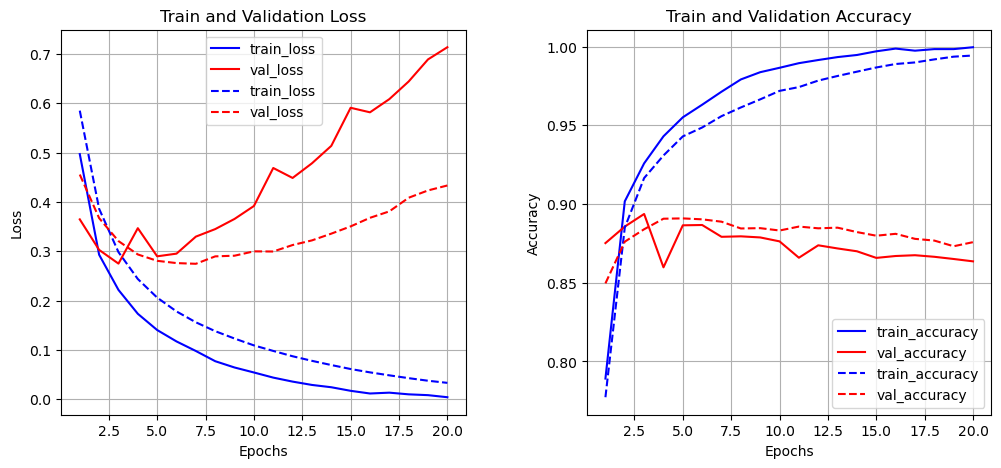

In [17]:
diff_history(history_original, history_smaller_model)

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-05-20 12:28:27.608852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.7591

2024-05-20 12:28:38.268665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 14s 244ms/step - loss: 0.5469 - accuracy: 0.7591 - val_loss: 0.3201 - val_accuracy: 0.8836
Epoch 2/20
30/30 [==============================] - 2s 70ms/step - loss: 0.2509 - accuracy: 0.9015 - val_loss: 0.4946 - val_accuracy: 0.7955
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1617 - accuracy: 0.9378 - val_loss: 0.2955 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0795 - accuracy: 0.9710 - val_loss: 0.3918 - val_accuracy: 0.8765
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.0582 - accuracy: 0.9806 - val_loss: 0.4078 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.5193 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 2s 79ms/step - loss: 4.6093e-04 - accuracy: 0.9999 - val_loss: 0.6637 - val_accuracy: 0.8876
Epoch 8/20
30/30 [

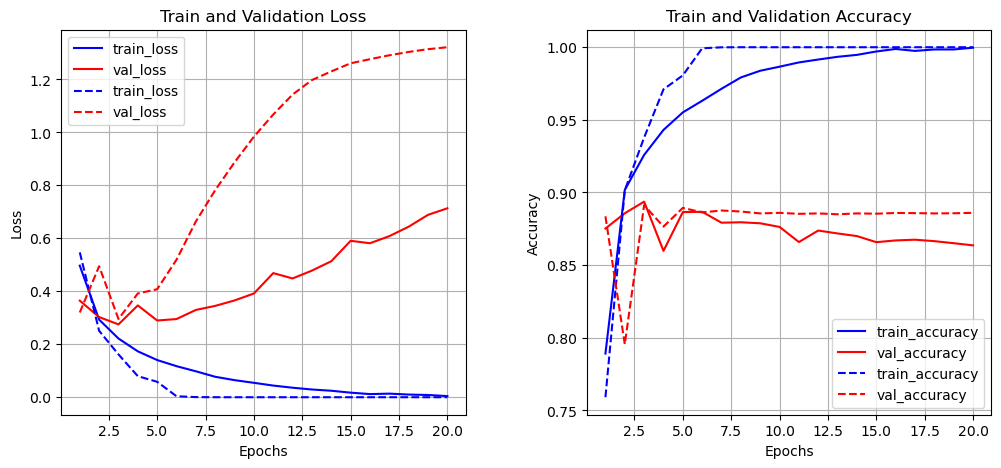

In [18]:
diff_history(history_original, history_larger_model)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-05-20 12:32:16.680718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5755 - accuracy: 0.7838

2024-05-20 12:32:21.799904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 8s 144ms/step - loss: 0.5755 - accuracy: 0.7838 - val_loss: 0.4456 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3817 - accuracy: 0.8972 - val_loss: 0.3905 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3207 - accuracy: 0.9167 - val_loss: 0.3604 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2880 - accuracy: 0.9282 - val_loss: 0.3531 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2717 - accuracy: 0.9327 - val_loss: 0.3598 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 2s 70ms/step - loss: 0.2558 - accuracy: 0.9401 - val_loss: 0.3571 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2473 - accuracy: 0.9437 - val_loss: 0.4222 - val_accuracy: 0.8595
Epoch 8/20
30/30 [=====

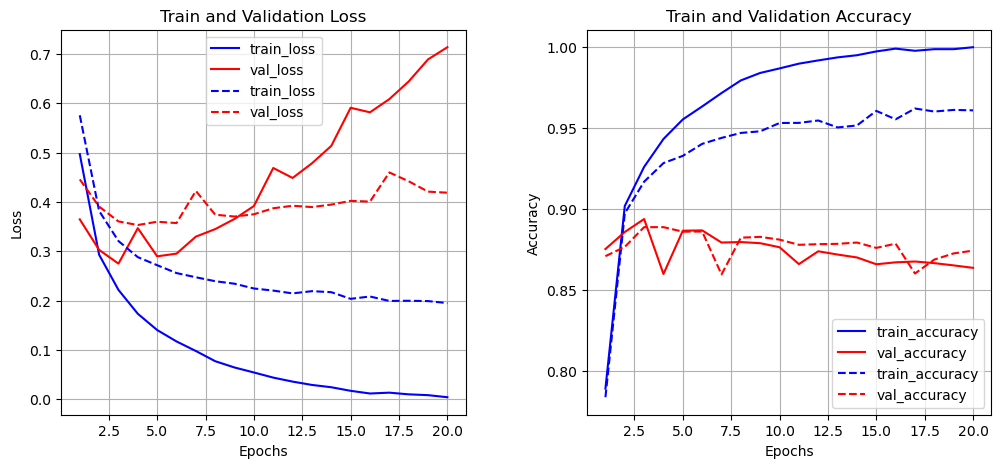

In [19]:
diff_history(history_original, history_l2_reg)

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2024-05-20 12:40:10.318825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.6406

2024-05-20 12:40:15.184414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 7s 136ms/step - loss: 0.6310 - accuracy: 0.6406 - val_loss: 0.5055 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4918 - accuracy: 0.7847 - val_loss: 0.3798 - val_accuracy: 0.8682
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4035 - accuracy: 0.8431 - val_loss: 0.3143 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3419 - accuracy: 0.8782 - val_loss: 0.2916 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2889 - accuracy: 0.9016 - val_loss: 0.2911 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2563 - accuracy: 0.9186 - val_loss: 0.2821 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2173 - accuracy: 0.9314 - val_loss: 0.2770 - val_accuracy: 0.8903
Epoch 8/20
30/30 [=====

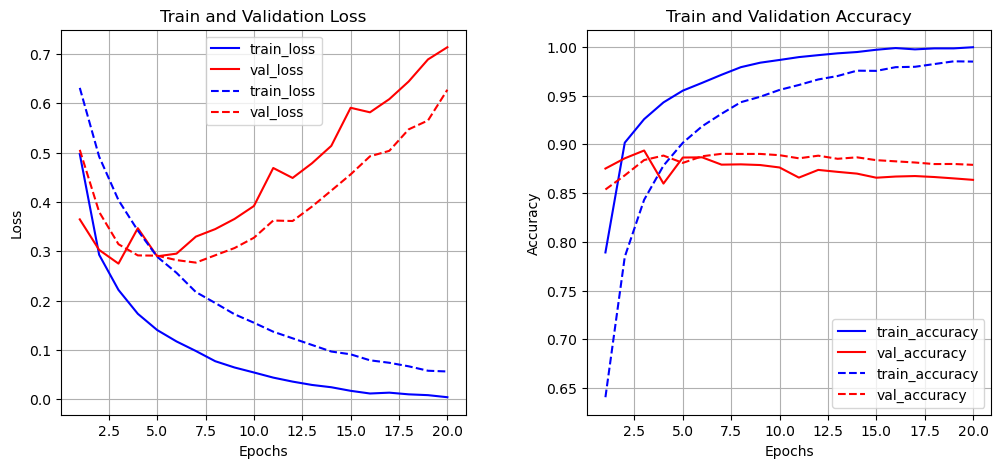

In [20]:
diff_history(history_original, history_dropout)

## Summary